In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()


ModuleNotFoundError: No module named 'matplotlib'

In [3]:
churn_data['describe_ex'] = churn_data['Exited'].apply(lambda x: 'ушедший клиент'if x == 1 else 'лояльный клиент') 
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,describe_ex
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,ушедший клиент
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,лояльный клиент
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,ушедший клиент
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,лояльный клиент
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,лояльный клиент


In [5]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? "круговая либо пончик" 
# Покажите это на графике и дайте комментарий по соотношению.
exited_ratio = churn_data['describe_ex'].value_counts()
#exited_ratio['describe'] = exited_ratio.index.apply(lambda x: ('лояльные'if x = 0 else 'ушедшие') )#lambda a, b: a if a > b else b
fig = px.pie(
    exited_ratio,
    values='count',
    names= exited_ratio.index,
    hole=0.8,#.apply(lambda x:{0:'лояльные', 1:'ушедшие'}),
    title='Соотношение ушедших и лояльных клиентов',
    )
fig.update_layout(
    annotations=[dict(
        text='Ушедших клиентов<br>почти<br>в 5 раз меньше<br>чем лояльных',
        x=0.5,
        y=0.5,
        font_size=20,
        showarrow=False
        )])
fig.show()

Ушедших клиентов почти в 5 раз меньше чем лояльных

In [6]:
#exited_ratio = churn_data['Exited'].value_counts()
display(exited_ratio)

describe_ex
лояльный клиент    7963
ушедший клиент     2037
Name: count, dtype: int64

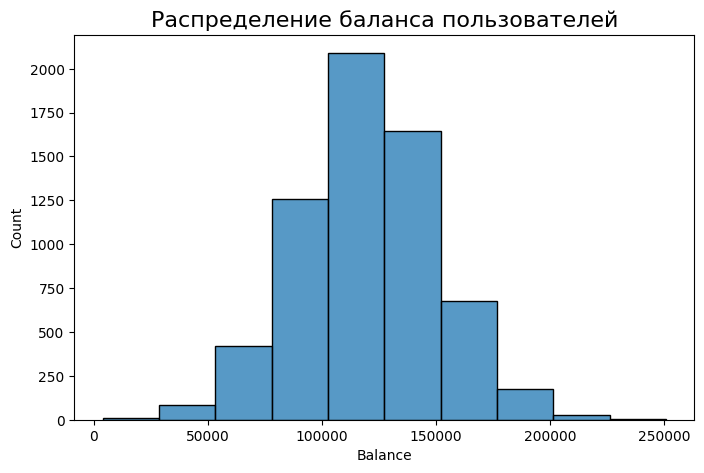

In [7]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, "гистограмма"
# у которых на счету больше 2 500 долларов. "маска"
mask = churn_data['Balance'] > 2500
fig, axes = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=churn_data[mask],
    x='Balance',
    bins=10,
    kde=False,
    
);
axes.set_title('Распределение баланса пользователей', fontsize=16);
# Опишите распределение и сделайте выводы.

Основная часть пользователей с балансом от 50000 до 175000

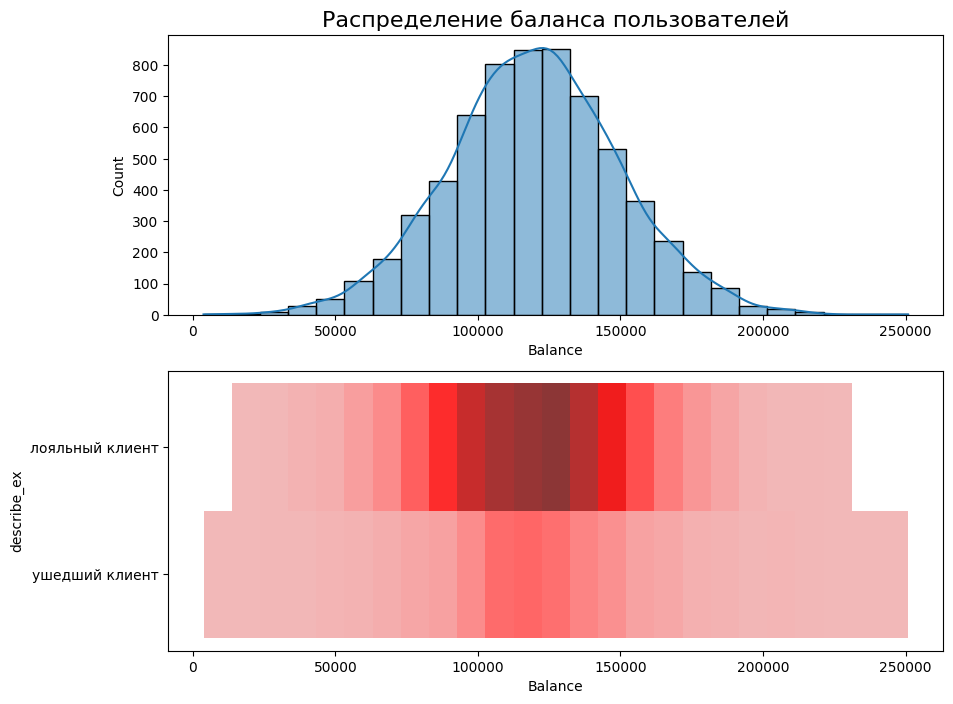

In [8]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
# Подумайте и напишите,
# с чем это может быть связано,
# что может не устраивать ушедших клиентов в банке.
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=churn_data[mask],
    x='Balance',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Распределение баланса пользователей', fontsize=16)
sns.histplot(
    data=churn_data[mask],
    x='Balance',
    y='describe_ex',
    bins=25,
    color='red',
    ax=axes[1]
);

У ушедших клиентов в общем случае меньше средств на счетах. Баланс лояльных клиентов составляет основную долю в структуре баланса клиентов

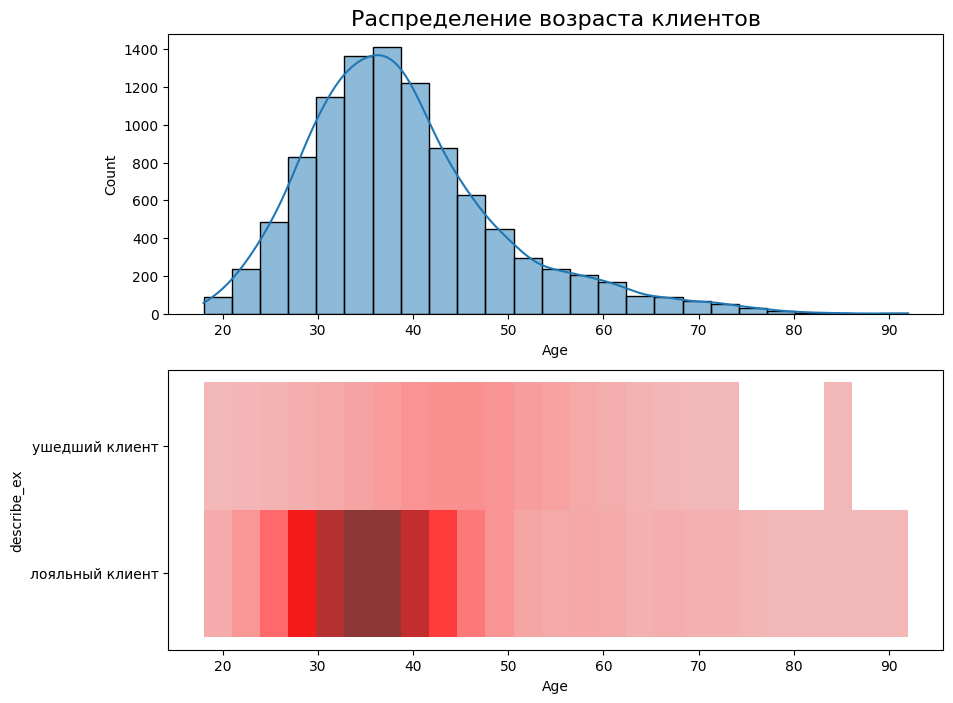

In [9]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока.    "Коробчатая"
# В какой группе больше потенциальных выбросов?
# На какую возрастную категорию клиентов стоит обратить внимание банку?
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=churn_data,
    x='Age',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Распределение возраста клиентов', fontsize=16)
sns.histplot(
    data=churn_data,
    x='Age',
    y='describe_ex',
    bins=25,
    color='red',
    ax=axes[1]
);

Потенциальных выбросов больше в группе ушедших клиентов (возраст 80-90). Обратить внимание стоит на возрастную группу от 40 до 50 их больше всего среди ушедших клиентов.

In [14]:
# 9.5. Постройте график, который показывает 
# взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.
# Добавьте расцветку по признаку оттока клиентов.
# Какова взаимосвязь между признаками?
# Если не видите явной взаимосвязи, укажите это.
fig = px.scatter(
    data_frame=churn_data,
    x= 'EstimatedSalary',
    y= 'Balance',
    color='Exited',
    title=''
)
fig.show()

Явной взаимосвязи не замечено

In [26]:
# 9.6. Кто чаще уходит, мужчины или женщины?
# Постройте график, который иллюстрирует это.
# Подсказка
# Процент ушедших клиентов в каждой группе можно рассчитать
# как среднее по столбцу Exited 
# (так как 1 — это ушедшие клиенты,
# а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).
mean_exited = churn_data.groupby('Gender')['Exited'].mean()*100
#vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

fig2 = px.bar(
    data_frame=mean_exited,
    x= mean_exited.index,
    y= mean_exited,
    title='Сравнение доли ушедших клиетов в зависимости от пола',
    labels={'y':'Доля ушедших клиенов,%','Gender':'Пол'}
)
fig2.show()
# Вывод: Женщины уходят в 1.5 раза чаще, чем мужчины 

Женщины уходят в полтора раза чаще чем мужчины

In [18]:
bar_data = churn_data.groupby(
    by= ['NumOfProducts','Exited'],
    as_index=False
)['Exited'].value_counts()#.agg(['count'])
bar_data_grouped = bar_data.groupby(
    by=['NumOfProducts'],
    as_index=False
).agg(['sum'])
display(bar_data)
display(bar_data_grouped)

,NumOfProducts,Exited,count
0,1,0,3675
1,1,1,1409
2,2,0,4242
3,2,1,348
4,3,0,46
5,3,1,220
6,4,1,60


,Exited,count
,sum,sum
NumOfProducts,,
1,1,5084
2,1,4590
3,1,266
4,1,60


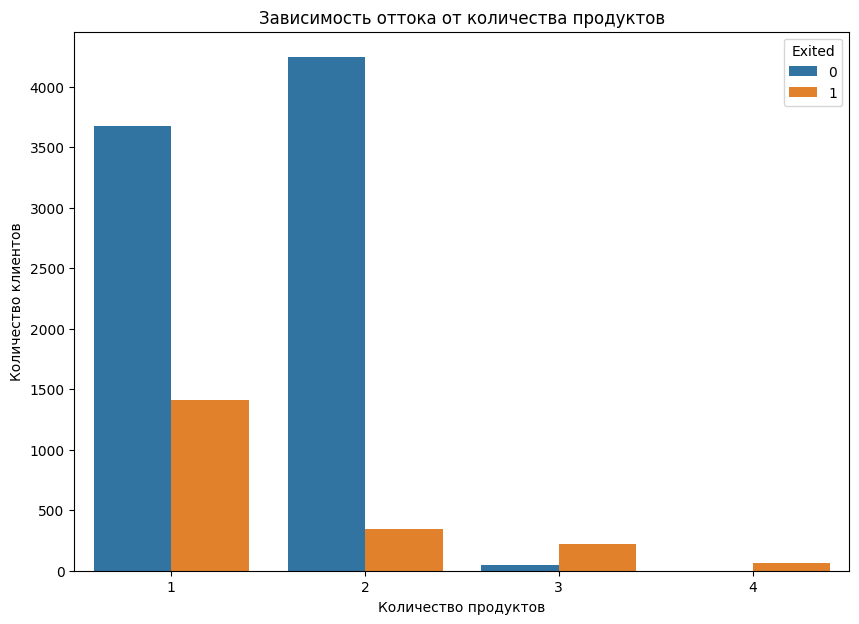

In [67]:
fig = plt.figure(figsize=(10, 7))
#croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=bar_data,
    x='NumOfProducts',
    y='count',
    hue='Exited',
    
)
barplot.set_title('Зависимость оттока от количества продуктов');
barplot.set_xlabel('Количество продуктов');
barplot.set_ylabel('Количество клиентов');
#barplot.set_label('')


In [11]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг?
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

bar_data = churn_data.groupby(
    by= ['NumOfProducts','describe_ex'],
    as_index=False
)['describe_ex'].agg(['count'])


#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x='NumOfProducts', #ось x
    y= 'count', #ось y
    color='describe_ex', #расцветка в зависимости от страны
    barmode='group',
    labels={'NumOfProducts':'Количество продуктов','count':'Количество клиентов','describe_ex':'Статус клиента'},
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Зависимость оттока клиентов от числа приобретенных у банка услуг' #заголовок
)

#отображаем его
fig.show()

Чем больше продуктов, тем меньше ушедших клиентов в абсолютных значениях. Но в процентном соотношении четкой тенденции нет. При одном продукте доля ушедших около 28 процентов, при 2х продуктах доля ушедших около 7 процентов - т.е. при изменении статуса клиента от только пришедшего (т.е. он пользуется 1 продуктом и думает приобретать ли второй) к постоянному (т.е. он уже приобрел второй продукт потому, что он доволен первым и самим банком) его лояльность к банку повышается. Затем при покупке 3 продукта возможно у клиента складываются завышенные ожидания. При трех продуктах доля ушедших 83 процента, при четырех продуктах доля ушедших 100 процентов, т.е. все кто приобрел 4 продукта уходят.

In [5]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов?
# Постройте диаграмму, иллюстрирующую это.
# Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?
bar_data = churn_data.groupby(
    by= ['IsActiveMember','describe_ex'],
    as_index=False
)['describe_ex'].agg(['count'])
bar_data['rate'] =


#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x='IsActiveMember', #ось x
    y= 'count', #ось y
    color='describe_ex', #расцветка статуса клиента
    barmode='group',
    labels={'IsActiveMember':'Статус активности','count':'Количество клиентов','describe_ex':'Статус клиента'},
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Зависимость оттока клиентов от активности клиентов' #заголовок
)

#отображаем его
fig.show()

Активные клиенты уходят реже. Делать из неактивных клиентов активных, продавая им второй продукт 

In [22]:
choropleth_data1 = churn_data.groupby(by='Geography', as_index=False)['Geography'].value_counts()
display(choropleth_data1)
choropleth_data2 = churn_data[churn_data['Exited']==1].groupby(by='Geography', as_index=False)['Exited'].value_counts()
choropleth_data1['rate_percent'] = choropleth_data2['count']/choropleth_data1['count']*100

display(choropleth_data2)
display(choropleth_data1)

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


,Geography,Exited,count
0,France,1,810
1,Germany,1,814
2,Spain,1,413


,Geography,count,rate_percent
0,France,5014,16.154767
1,Germany,2509,32.443204
2,Spain,2477,16.673395


In [23]:
# 9.9. В какой стране доля ушедших клиентов больше?
# Постройте тепловую картограмму,
# которая покажет это соотношение на карте мира.
# Предположите, с чем это может быть связано.
#преобразуем даты в строки
choropleth_data1 = churn_data.groupby(by='Geography', as_index=False)['Geography'].value_counts()
choropleth_data2 = churn_data[churn_data['Exited']==1].groupby(by='Geography', as_index=False)['Exited'].value_counts()
choropleth_data1['rate_percent'] = choropleth_data2['count']/choropleth_data1['count']*100

#строим график
fig = px.choropleth(
    data_frame=choropleth_data1, #датафрейм
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color="rate_percent", #от чего зависит цвет
    #animation_frame="date", #анимационный ползунок
    range_color=[0, 30e6],
    title='Зависимость доли ушедших клиентов от страны', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем его
fig.show()

Доля ушедших клиентов больше в Германии. С чем это может быть 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,describe_ex,CreditScoreCat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,ушедший клиент,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,лояльный клиент,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,ушедший клиент,Poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,лояльный клиент,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,лояльный клиент,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,лояльный клиент,Good
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,лояльный клиент,Poor
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,ушедший клиент,Good
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,ушедший клиент,Good


Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


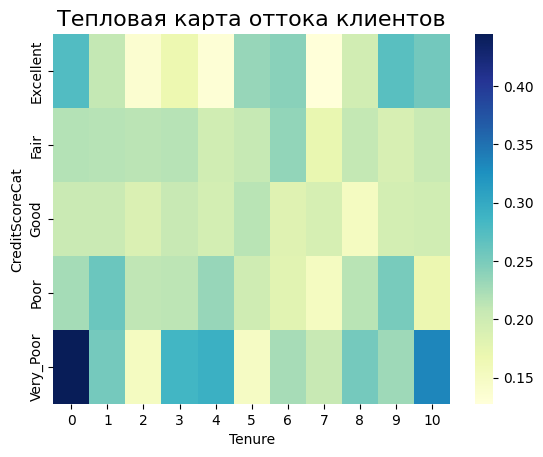

In [30]:
# 9.10. Переведите числовой признак CreditScore в категориальный.
# Для этого воспользуйтесь функцией get_credit_score_cat(),
# которая приведена ниже.
# Примените её к столбцу CreditScore 
# и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat']= churn_data['CreditScore'].apply(get_credit_score_cat)
display(churn_data)

pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=16);
# Постройте сводную таблицу,
# строками которой являются категории кредитного рейтинга (CreditScoreCat),
# а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure).
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited)
# — доля ушедших пользователей.

# На основе полученной сводной таблицы постройте тепловую карту с аннотацией.
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Чаще всего уходят клиенты категории Very_Poor в течении первого года. Часто уходят клиенты той же категории которые пользовались услугами банка в течении 10 лет. Клиенты категории Excellent также уходят достаточно часто в течении первого года обслуживания